In [1]:
import os
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
data_directory = 'raw_data/'
manifest_path = os.path.join(data_directory, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [3]:
sessions = cache.get_session_table()

In [4]:
sampleSession = cache.get_session_data(sessions.index.values[0])

In [6]:
probes           = ['VISp', 'VISl', 'VISrl', 'VISal', 'VISpm', 'VISam', 'LGd', 'LP']
session_probes   = list(sampleSession.units.ecephys_structure_acronym.unique())
available_probes = list(set(probes) & set(session_probes))
available_probes

['VISam', 'VISpm', 'VISp', 'LGd', 'VISrl', 'LP', 'VISl']

In [5]:
sampleSession.metadata

{'specimen_name': 'Sst-IRES-Cre;Ai32-386129',
 'session_type': 'brain_observatory_1.1',
 'full_genotype': 'Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt',
 'sex': 'M',
 'age_in_days': 118.0,
 'rig_equipment_name': 'NP.1',
 'num_units': 884,
 'num_channels': 2219,
 'num_probes': 6,
 'num_stimulus_presentations': 70388,
 'session_start_time': datetime.datetime(2019, 1, 19, 0, 54, 18, tzinfo=tzoffset(None, -28800)),
 'ecephys_session_id': 715093703,
 'structure_acronyms': ['PO',
  'PoT',
  'LP',
  'DG',
  'CA1',
  'VISp',
  nan,
  'LGd',
  'CA3',
  'VISl',
  'VISrl',
  'grey',
  'VISpm',
  'VISam',
  'APN',
  'MB'],
 'stimulus_names': ['spontaneous',
  'gabors',
  'flashes',
  'drifting_gratings',
  'natural_movie_three',
  'natural_movie_one',
  'static_gratings',
  'natural_scenes']}

In [6]:
sampleSession.stimulus_names

['spontaneous',
 'gabors',
 'flashes',
 'drifting_gratings',
 'natural_movie_three',
 'natural_movie_one',
 'static_gratings',
 'natural_scenes']

In [7]:
sampleDF = sampleSession.get_stimulus_epochs()
sampleDF.drop(sampleDF[sampleDF.stimulus_name == "spontaneous"].index)

,start_time,stop_time,duration,stimulus_name,stimulus_block
1,73.537433,985.532551,911.995118,gabors,0.0
3,1274.523973,1573.023407,298.499434,flashes,1.0
5,1574.774823,2174.275707,599.500885,drifting_gratings,2.0
7,2205.301633,2805.836653,600.535020,natural_movie_three,3.0
9,2835.861733,3136.112583,300.250850,natural_movie_one,4.0
11,3166.137683,3765.638457,599.500775,drifting_gratings,5.0
13,4066.890123,4667.391743,600.501620,natural_movie_three,6.0
15,4697.416823,5380.987797,683.570975,drifting_gratings,7.0
17,5381.988653,5862.389913,480.401260,static_gratings,8.0
19,5892.415053,6372.832933,480.417880,natural_scenes,9.0


In [8]:
print(list(sampleSession.units["ecephys_structure_acronym"].unique()))

['APN', 'DG', 'CA1', 'VISam', 'grey', 'VISpm', 'PO', 'LP', 'PoT', 'VISp', 'LGd', 'CA3', 'VISl', 'VISrl']


In [9]:
sampleSession.stimulus_conditions

,color,contrast,frame,mask,opacity,orientation,phase,size,spatial_frequency,stimulus_name,temporal_frequency,units,x_position,y_position,color_triplet
stimulus_condition_id,,,,,,,,,,,,,,,
0,null,null,null,null,null,null,null,null,null,spontaneous,null,null,null,null,null
1,null,0.8,null,circle,1.0,45.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,gabors,4.0,deg,0.0,30.0,"[1.0, 1.0, 1.0]"
2,null,0.8,null,circle,1.0,0.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,gabors,4.0,deg,-30.0,-10.0,"[1.0, 1.0, 1.0]"
3,null,0.8,null,circle,1.0,45.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,gabors,4.0,deg,10.0,20.0,"[1.0, 1.0, 1.0]"
4,null,0.8,null,circle,1.0,0.0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,gabors,4.0,deg,-40.0,-40.0,"[1.0, 1.0, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5022,null,null,35.0,null,null,null,null,null,null,natural_scenes,null,null,null,null,null
5023,null,null,104.0,null,null,null,null,null,null,natural_scenes,null,null,null,null,null
5024,null,null,112.0,null,null,null,null,null,null,natural_scenes,null,null,null,null,null


In [10]:
sampleSession.units

,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
950910352,0.476196,106.785900,0.057700,6,419.57,4.576155,4.532385,0.029797,69.455405,0.002020,...,215.0,APN,8157.0,3521.0,6697.0,probeA,See electrode locations,29999.954846,1249.998119,True
950910364,0.953652,85.808775,0.065649,7,231.42,5.602703,31.486161,0.005998,102.847616,0.000146,...,215.0,APN,8154.0,3513.0,6698.0,probeA,See electrode locations,29999.954846,1249.998119,True
950910371,0.615593,76.898055,0.015509,8,209.31,5.061817,17.328610,0.005242,76.907610,0.004522,...,215.0,APN,8146.0,3487.0,6701.0,probeA,See electrode locations,29999.954846,1249.998119,True
950910392,0.616317,120.519555,0.025891,11,179.71,4.219074,16.262414,0.096884,65.671206,0.007306,...,215.0,APN,8133.0,3444.0,6707.0,probeA,See electrode locations,29999.954846,1249.998119,True
950910435,0.174735,66.974895,0.010061,17,99.99,6.393051,62.326305,0.004243,294.002222,0.000136,...,215.0,APN,8110.0,3367.0,6719.0,probeA,See electrode locations,29999.954846,1249.998119,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950956911,2.181048,91.264680,0.082007,205,166.36,1.917509,5.890958,0.270592,36.995342,0.132774,...,417.0,VISrl,7295.0,1020.0,8734.0,probeF,See electrode locations,30000.028033,1250.001168,True
950956870,0.496457,311.723490,0.000042,203,121.49,7.247881,0.647343,0.092982,80.682448,0.000068,...,417.0,VISrl,7295.0,1020.0,8734.0,probeF,See electrode locations,30000.028033,1250.001168,True
950956845,0.557797,137.348250,0.012523,201,235.47,4.235177,2.075303,0.262364,63.765826,0.001219,...,417.0,VISrl,7298.0,1031.0,8730.0,probeF,See electrode locations,30000.028033,1250.001168,True


In [11]:
presentations = sampleSession.get_stimulus_table("flashes")
units = sampleSession.units[sampleSession.units["ecephys_structure_acronym"] == 'VISp']

time_step = 0.01
time_bins = np.arange(-0.1, 0.5 + time_step, time_step)

histograms = sampleSession.presentationwise_spike_counts(
    stimulus_presentation_ids=presentations.index.values,  
    bin_edges=time_bins,
    unit_ids=units.index.values
)

histograms.coords

Coordinates:
  * stimulus_presentation_id         (stimulus_presentation_id) int64 3647 ... 3796
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 -0.095 ... 0.495
  * unit_id                          (unit_id) int64 950930145 ... 950933960

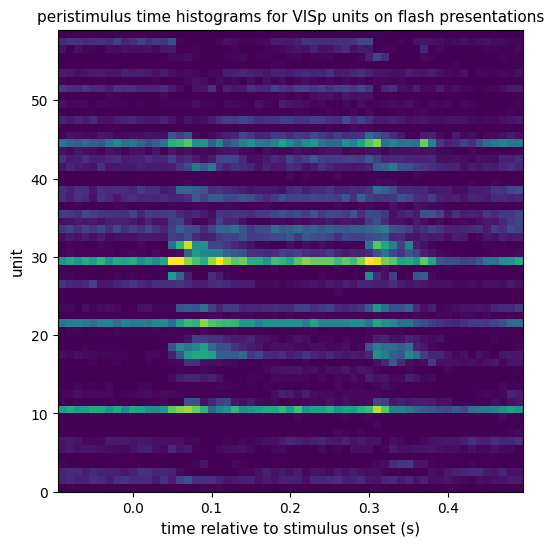

In [12]:
mean_histograms = histograms.mean(dim="stimulus_presentation_id")

fig, ax = plt.subplots(figsize=(6, 6))
ax.pcolormesh(
    mean_histograms["time_relative_to_stimulus_onset"], 
    np.arange(mean_histograms["unit_id"].size),
    mean_histograms.T, 
    vmin=0,
    vmax=1
)

ax.set_ylabel("unit", fontsize=11)
ax.set_xlabel("time relative to stimulus onset (s)", fontsize=11)
ax.set_title("peristimulus time histograms for VISp units on flash presentations", fontsize=11)

plt.show()

In [13]:
speedDF = sampleSession.get_pupil_data()
speedDF

This ecephys session '715093703' has no eye tracking data. (NWB error: "'eye_tracking' not found in processing of NWBFile 'root'.")


In [14]:
sampleSession.units.columns

Index(['waveform_PT_ratio', 'waveform_amplitude', 'amplitude_cutoff',
       'cluster_id', 'cumulative_drift', 'd_prime', 'firing_rate',
       'isi_violations', 'isolation_distance', 'L_ratio', 'local_index',
       'max_drift', 'nn_hit_rate', 'nn_miss_rate', 'peak_channel_id',
       'presence_ratio', 'waveform_recovery_slope',
       'waveform_repolarization_slope', 'silhouette_score', 'snr',
       'waveform_spread', 'waveform_velocity_above', 'waveform_velocity_below',
       'waveform_duration', 'filtering', 'probe_channel_number',
       'probe_horizontal_position', 'probe_id', 'probe_vertical_position',
       'structure_acronym', 'ecephys_structure_id',
       'ecephys_structure_acronym', 'anterior_posterior_ccf_coordinate',
       'dorsal_ventral_ccf_coordinate', 'left_right_ccf_coordinate',
       'probe_description', 'location', 'probe_sampling_rate',
       'probe_lfp_sampling_rate', 'probe_has_lfp_data'],
      dtype='object')

In [15]:
sampleSession.units

,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
950910352,0.476196,106.785900,0.057700,6,419.57,4.576155,4.532385,0.029797,69.455405,0.002020,...,215.0,APN,8157.0,3521.0,6697.0,probeA,See electrode locations,29999.954846,1249.998119,True
950910364,0.953652,85.808775,0.065649,7,231.42,5.602703,31.486161,0.005998,102.847616,0.000146,...,215.0,APN,8154.0,3513.0,6698.0,probeA,See electrode locations,29999.954846,1249.998119,True
950910371,0.615593,76.898055,0.015509,8,209.31,5.061817,17.328610,0.005242,76.907610,0.004522,...,215.0,APN,8146.0,3487.0,6701.0,probeA,See electrode locations,29999.954846,1249.998119,True
950910392,0.616317,120.519555,0.025891,11,179.71,4.219074,16.262414,0.096884,65.671206,0.007306,...,215.0,APN,8133.0,3444.0,6707.0,probeA,See electrode locations,29999.954846,1249.998119,True
950910435,0.174735,66.974895,0.010061,17,99.99,6.393051,62.326305,0.004243,294.002222,0.000136,...,215.0,APN,8110.0,3367.0,6719.0,probeA,See electrode locations,29999.954846,1249.998119,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950956911,2.181048,91.264680,0.082007,205,166.36,1.917509,5.890958,0.270592,36.995342,0.132774,...,417.0,VISrl,7295.0,1020.0,8734.0,probeF,See electrode locations,30000.028033,1250.001168,True
950956870,0.496457,311.723490,0.000042,203,121.49,7.247881,0.647343,0.092982,80.682448,0.000068,...,417.0,VISrl,7295.0,1020.0,8734.0,probeF,See electrode locations,30000.028033,1250.001168,True
950956845,0.557797,137.348250,0.012523,201,235.47,4.235177,2.075303,0.262364,63.765826,0.001219,...,417.0,VISrl,7298.0,1031.0,8730.0,probeF,See electrode locations,30000.028033,1250.001168,True


In [44]:
v1units = sampleSession.units[(sampleSession.units.ecephys_structure_acronym == 'VISp')]

In [17]:
v1units

,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
950930340,0.480842,183.61161,0.000018,418,51.22,4.752755,1.674368,0.000000,55.450465,2.078934e-03,...,385.0,VISp,8596.0,1416.0,8207.0,probeC,See electrode locations,29999.98547,1249.999395,True
950930407,0.584665,139.34388,0.001929,422,78.79,5.275999,52.195576,0.005406,143.663038,4.238201e-04,...,385.0,VISp,8599.0,1404.0,8206.0,probeC,See electrode locations,29999.98547,1249.999395,True
950930522,0.506875,147.27102,0.044535,430,119.85,3.738503,4.295951,0.151357,40.220730,2.972601e-02,...,385.0,VISp,8606.0,1367.0,8202.0,probeC,See electrode locations,29999.98547,1249.999395,True
950930866,0.613769,164.60262,0.001250,444,190.02,4.766229,4.970599,0.184995,57.674502,4.218118e-03,...,385.0,VISp,8616.0,1318.0,8196.0,probeC,See electrode locations,29999.98547,1249.999395,True
950930985,0.559480,223.70907,0.000113,450,59.32,7.322933,45.575224,0.001100,195.199382,5.005818e-04,...,385.0,VISp,8623.0,1281.0,8191.0,probeC,See electrode locations,29999.98547,1249.999395,True
950930964,0.709928,225.67779,0.000002,449,76.37,6.167082,14.555559,0.000000,115.742752,5.087651e-05,...,385.0,VISp,8623.0,1281.0,8191.0,probeC,See electrode locations,29999.98547,1249.999395,True
950931164,0.428744,202.55196,0.000112,462,133.26,4.547098,1.870834,0.036275,43.551456,7.538966e-03,...,385.0,VISp,8633.0,1232.0,8185.0,probeC,See electrode locations,29999.98547,1249.999395,True
950931423,0.439582,155.31711,0.000543,474,95.16,4.234081,5.054492,0.009939,58.354075,4.411411e-03,...,385.0,VISp,8643.0,1183.0,8178.0,probeC,See electrode locations,29999.98547,1249.999395,True
950931458,0.478459,665.75301,0.000055,476,64.77,10.890555,16.941722,0.001917,173.885518,4.130696e-10,...,385.0,VISp,8646.0,1170.0,8177.0,probeC,See electrode locations,29999.98547,1249.999395,True


In [18]:
v1_unit_ids = v1units.index.values

In [19]:
drifting_gratings_presentation_ids = sampleSession.stimulus_presentations.loc[
    (sampleSession.stimulus_presentations['stimulus_name'] == 'drifting_gratings')
].index.values

In [20]:
sampleSession.stimulus_presentations.loc[(sampleSession.stimulus_presentations.stimulus_name == 'drifting_gratings') & 
                                    sampleSession.stimulus_presentations.temporal_frequency == 1].index.values

array([ 3798,  3799,  3800,  3801,  3802,  3803,  3804,  3805,  3806,
        3807,  3808,  3809,  3810,  3811,  3812,  3813,  3814,  3815,
        3816,  3817,  3818,  3819,  3820,  3821,  3822,  3823,  3824,
        3825,  3826,  3827,  3828,  3829,  3830,  3831,  3832,  3833,
        3834,  3835,  3836,  3837,  3838,  3839,  3840,  3841,  3842,
        3843,  3844,  3845,  3846,  3847,  3848,  3849,  3850,  3851,
        3852,  3853,  3854,  3855,  3856,  3857,  3858,  3859,  3860,
        3861,  3862,  3863,  3864,  3865,  3866,  3867,  3868,  3869,
        3870,  3871,  3872,  3873,  3874,  3875,  3876,  3877,  3878,
        3879,  3880,  3881,  3882,  3883,  3884,  3885,  3886,  3887,
        3888,  3889,  3890,  3891,  3892,  3893,  3894,  3895,  3896,
        3897,  3898,  3899,  3900,  3901,  3902,  3903,  3904,  3905,
        3906,  3907,  3908,  3909,  3910,  3911,  3912,  3913,  3914,
        3915,  3916,  3917,  3918,  3919,  3920,  3921,  3922,  3923,
        3924,  3925,

In [21]:
times = sampleSession.presentationwise_spike_times(
    stimulus_presentation_ids=drifting_gratings_presentation_ids,
    unit_ids=v1_unit_ids
)

times.head()

,stimulus_presentation_id,unit_id,time_since_stimulus_presentation_onset
spike_time,,,
1574.780290,3798,950930407,0.005468
1574.781290,3798,950931581,0.006468
1574.789224,3798,950930985,0.014401
1574.796124,3798,950930407,0.021301
1574.804024,3798,950930407,0.029201


In [23]:
drifting_gratings_presentation_ids

array([ 3798,  3799,  3800,  3801,  3802,  3803,  3804,  3805,  3806,
        3807,  3808,  3809,  3810,  3811,  3812,  3813,  3814,  3815,
        3816,  3817,  3818,  3819,  3820,  3821,  3822,  3823,  3824,
        3825,  3826,  3827,  3828,  3829,  3830,  3831,  3832,  3833,
        3834,  3835,  3836,  3837,  3838,  3839,  3840,  3841,  3842,
        3843,  3844,  3845,  3846,  3847,  3848,  3849,  3850,  3851,
        3852,  3853,  3854,  3855,  3856,  3857,  3858,  3859,  3860,
        3861,  3862,  3863,  3864,  3865,  3866,  3867,  3868,  3869,
        3870,  3871,  3872,  3873,  3874,  3875,  3876,  3877,  3878,
        3879,  3880,  3881,  3882,  3883,  3884,  3885,  3886,  3887,
        3888,  3889,  3890,  3891,  3892,  3893,  3894,  3895,  3896,
        3897,  3898,  3899,  3900,  3901,  3902,  3903,  3904,  3905,
        3906,  3907,  3908,  3909,  3910,  3911,  3912,  3913,  3914,
        3915,  3916,  3917,  3918,  3919,  3920,  3921,  3922,  3923,
        3924,  3925,

In [5]:
labelsDF = pd.read_csv('labels.csv')
labelsDF.head()

,name,natural,man-made,bird,non-bird
0,natural_scene_0.tiff,0,0,0,1
1,natural_scene_1.tiff,0,0,0,1
2,natural_scene_2.tiff,0,0,0,1
3,natural_scene_3.tiff,0,0,0,1
4,natural_scene_4.tiff,0,0,1,0


In [6]:
animateDF   = labelsDF[(labelsDF['bird'] == 1) | (labelsDF['non-bird'] == 1)]
inanimateDF = labelsDF[(labelsDF['natural'] == 1) | (labelsDF['man-made'] == 1)]
birdDF      = labelsDF[labelsDF['bird'] == 1]
nbirdDF     = labelsDF[labelsDF['non-bird'] == 1]
naturalDF   = labelsDF[labelsDF['natural'] == 1]
manmadeDF   = labelsDF[labelsDF['man-made'] == 1]

In [7]:
animateDF.head()

,name,natural,man-made,bird,non-bird
0,natural_scene_0.tiff,0,0,0,1
1,natural_scene_1.tiff,0,0,0,1
2,natural_scene_2.tiff,0,0,0,1
3,natural_scene_3.tiff,0,0,0,1
4,natural_scene_4.tiff,0,0,1,0


In [8]:
inanimateDF.head()

,name,natural,man-made,bird,non-bird
20,natural_scene_20.tiff,1,0,0,0
30,natural_scene_30.tiff,1,0,0,0
31,natural_scene_31.tiff,1,0,0,0
37,natural_scene_37.tiff,1,0,0,0
40,natural_scene_40.tiff,1,0,0,0


In [10]:
birdDF.head()

,name,natural,man-made,bird,non-bird
4,natural_scene_4.tiff,0,0,1,0
18,natural_scene_18.tiff,0,0,1,0
19,natural_scene_19.tiff,0,0,1,0
21,natural_scene_21.tiff,0,0,1,0
24,natural_scene_24.tiff,0,0,1,0


In [11]:
nbirdDF.head()

,name,natural,man-made,bird,non-bird
0,natural_scene_0.tiff,0,0,0,1
1,natural_scene_1.tiff,0,0,0,1
2,natural_scene_2.tiff,0,0,0,1
3,natural_scene_3.tiff,0,0,0,1
5,natural_scene_5.tiff,0,0,0,1


In [13]:
naturalDF.head()

,name,natural,man-made,bird,non-bird
20,natural_scene_20.tiff,1,0,0,0
30,natural_scene_30.tiff,1,0,0,0
31,natural_scene_31.tiff,1,0,0,0
37,natural_scene_37.tiff,1,0,0,0
40,natural_scene_40.tiff,1,0,0,0


In [14]:
manmadeDF.head()

,name,natural,man-made,bird,non-bird
72,natural_scene_72.tiff,0,1,0,0
79,natural_scene_79.tiff,0,1,0,0
81,natural_scene_81.tiff,0,1,0,0
84,natural_scene_84.tiff,0,1,0,0
85,natural_scene_85.tiff,0,1,0,0


In [5]:
def indice_calculator(dataframe, stim_table):
    indice_list = []
    for i in range(dataframe.shape[0]):
        file_name = dataframe.iloc[i].split('.')
        indice_list.append(float(file_name[0].split('_')[-1]))
        
    stim_images   = stim_table[stim_table.stimulus_name == 'natural_scenes']
    object_indice = stim_images[stim_images.frame.isin(indice_list)].index.values
    return object_indice

## Extracting Probes
probes           = ['VISp', 'VISl', 'VISrl', 'VISal', 'VISpm', 'VISam', 'LGd', 'LP']
session_probes   = list(sampleSession.units.ecephys_structure_acronym.unique())
available_probes = list(set(probes) & set(session_probes))

## Extracting Stimuli
wholeDataFrame   = pd.read_csv('labels.csv')
treeDataFrame    = wholeDataFrame[wholeDataFrame.Tree == 1].name
felineDataFrame  = wholeDataFrame[wholeDataFrame.Feline == 1].name

stimTable        = sampleSession.get_stimulus_table()
treeImgIndices   = indice_calculator(treeDataFrame, stimTable)
felineImgIndices = indice_calculator(felineDataFrame, stimTable)

# numImages        = treeImages.frame.unique().shape[0]
felineImgIndices.shape
# for img in range(numImages):
#     print(treeImages[treeImages.frame == img].index.values.shape[0])

(650,)

In [6]:
treeDataFrame

59      natural_scene_59.tiff
60      natural_scene_60.tiff
61      natural_scene_61.tiff
62      natural_scene_62.tiff
80      natural_scene_80.tiff
82      natural_scene_82.tiff
92      natural_scene_92.tiff
95      natural_scene_95.tiff
96      natural_scene_96.tiff
98      natural_scene_98.tiff
99      natural_scene_99.tiff
100    natural_scene_100.tiff
107    natural_scene_107.tiff
108    natural_scene_108.tiff
Name: name, dtype: object

In [7]:
felineDataFrame

5      natural_scene_5.tiff
6      natural_scene_6.tiff
7      natural_scene_7.tiff
10    natural_scene_10.tiff
11    natural_scene_11.tiff
12    natural_scene_12.tiff
15    natural_scene_15.tiff
16    natural_scene_16.tiff
17    natural_scene_17.tiff
22    natural_scene_22.tiff
27    natural_scene_27.tiff
39    natural_scene_39.tiff
47    natural_scene_47.tiff
Name: name, dtype: object